In [1]:

import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
import tensorflow

file_list = []
class_list = []

DATADIR = "data2"

In [2]:
CATEGORIES = [    
    "Certyfikaty",
    "CV",
    "Dokumenty (Faktury, Umowy, Zarzadzenia)",
    "Dokumenty Tozsamosci",
    "Karty Kredytowe",
    "Odciski Palcow",
    "Publikacje Naukowe i Artykuly",
    "Wykresy i Schematy"
]


# CATEGORIES = ["Animal", "Vehicle", "Credit_card"]

In [3]:
IMG_SIZE = 250

In [4]:

# for category in CATEGORIES :
# 	path = os.path.join(DATADIR, category)
# 	for img in os.listdir(path):
# 		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

In [5]:
training_data = []
import tensorflow as tf 
def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass
create_training_data()
random.shuffle(training_data)

In [6]:
X = [] #features
# y = np.array(y)
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(label)
y = np.array(y)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# pickle_in = open("X.pickle", "rb")
# X = pickle.load(pickle_in)

In [7]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import categorical_accuracy

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(128, (7, 7), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (7, 7)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (5, 5)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (5, 5)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# model.add(Dropout(0.5))

# model.add(Conv2D(128, (3, 3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(128, (3, 3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation("relu"))

model.add(Dense(8))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[categorical_accuracy])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=50, validation_split=0.2)

# Saving the model
# model_json = model.to_json()
# with open("model.json", "w") as json_file :
# 	json_file.write(model_json)

# model.save_weights("model.h5")
# print("Saved model to disk")

# model.save('CNN3.model')

# Printing a graph showing the accuracy changes during the training phase


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
124/124 [==============================] - ETA: 0s - loss: 1.9866 - accuracy: 0.2123WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002D25D9DD798> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and atta

124/124 [==============================] - 13s 103ms/step - loss: 0.1760 - accuracy: 0.9390 - val_loss: 0.6201 - val_accuracy: 0.8458
Epoch 45/50
124/124 [==============================] - 13s 104ms/step - loss: 0.1848 - accuracy: 0.9350 - val_loss: 0.5937 - val_accuracy: 0.8478
Epoch 46/50
124/124 [==============================] - 13s 105ms/step - loss: 0.2017 - accuracy: 0.9440 - val_loss: 0.6725 - val_accuracy: 0.8367
Epoch 47/50
124/124 [==============================] - 13s 106ms/step - loss: 0.1837 - accuracy: 0.9350 - val_loss: 0.7397 - val_accuracy: 0.8337
Epoch 48/50
124/124 [==============================] - 13s 105ms/step - loss: 0.1900 - accuracy: 0.9390 - val_loss: 0.6288 - val_accuracy: 0.8438
Epoch 49/50
124/124 [==============================] - 13s 104ms/step - loss: 0.1631 - accuracy: 0.9473 - val_loss: 0.6056 - val_accuracy: 0.8377
Epoch 50/50
124/124 [==============================] - 13s 104ms/step - loss: 0.1384 - accuracy: 0.9481 - val_loss: 0.6055 - val_accurac

In [ ]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

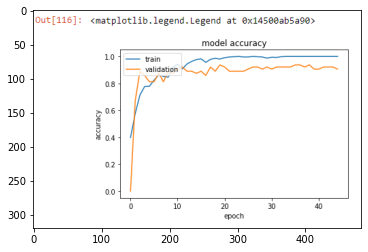

100.0
CV


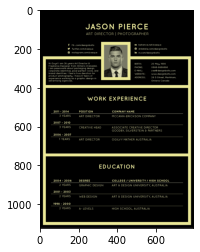

100.0
CV


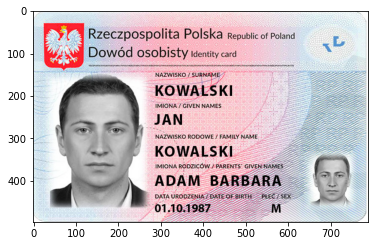

100.0
Dokumenty Tozsamosci


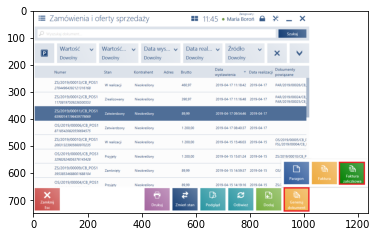

100.0
Publikacje Naukowe i Artykuly


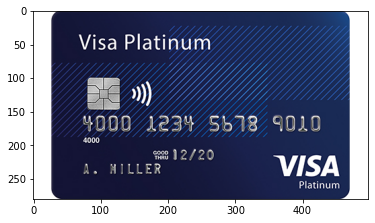

100.0
Karty Kredytowe


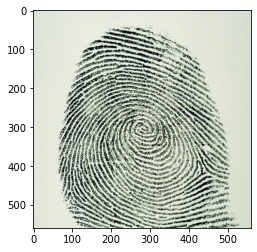

100.0
Publikacje Naukowe i Artykuly


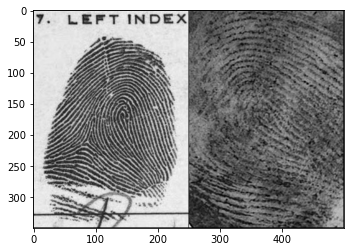

100.0
Wykresy i Schematy


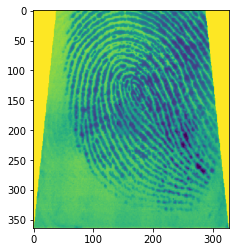

100.0
Odciski Palcow


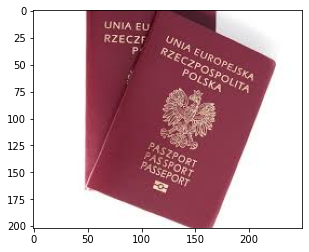

100.0
Wykresy i Schematy


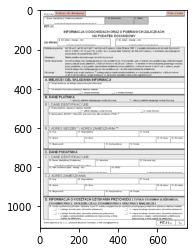

100.0
CV


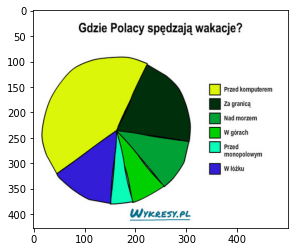

100.0
Wykresy i Schematy


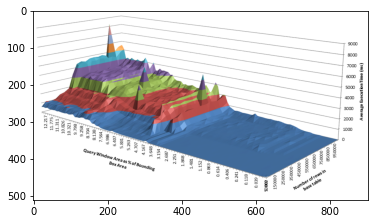

100.0
Wykresy i Schematy


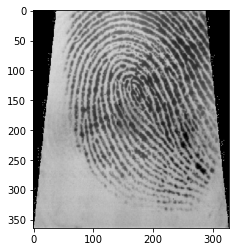

100.0
Certyfikaty


In [10]:
import tensorflow as tf
import cv2
import os
import numpy as np
# CATEGORIES = ["Animal", "Vehicle", "Credit_card"]
CATEGORIES = [    
    "Certyfikaty",
    "CV",
    "Dokumenty (Faktury, Umowy, Zarzadzenia)",
    "Dokumenty Tozsamosci",
    "Karty Kredytowe",
    "Odciski Palcow",
    "Publikacje Naukowe i Artykuly",
    "Wykresy i Schematy"
]
import matplotlib.image as mpimg
path = "Data/Animal"
p = os.listdir(path)
for i in p:
    img = mpimg.imread(path+i)
    imgplot = plt.imshow(img)
    plt.show()
    def prepare(file):
        IMG_SIZE = 250
        img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    # model = tf.keras.models.load_model("CNN3.model")
    image = prepare(path+"/"+i).astype(np.float32)
    prediction = model.predict([image])
    prediction = list(prediction[0])
    print(max(prediction)*100)
    print(CATEGORIES[prediction.index(max(prediction))])